In [1]:
import pandas as pd

In [2]:
import nosqlite

In [3]:
conn = nosqlite.Connection("../data/results.db")

In [4]:
bigg = conn["bigg"]

In [5]:
bigg.count()

83

In [6]:
template = bigg.find_one()

In [7]:
class Bag(list):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def pluck(self, key, default=None):
        return Bag(doc.get(key, default) for doc in self)

In [8]:
bag = Bag(bigg.find())

In [9]:
conn.close()

In [10]:
len(bag)

83

In [11]:
template["report"]["test_basic"]["test_model_id_presence"].keys()

dict_keys(['data', 'duration', 'message', 'metric', 'result', 'summary', 'title', 'type'])

In [12]:
from IPython.display import display

In [13]:
import matplotlib

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [42]:
tests = list()
titles = list()
summaries = list()
metrics = list()
other = list()
other_col = list()
for module in template["report"]:
    for test in template["report"][module]:
        data_type = template["report"][module][test].get("type", "")
        if data_type == "object":
            print("Skipping", test)
            continue
        t = template["report"][module][test].get("title", "")
        if t == "":
            print(test, "has no title.")
            continue
        tests.append(test)
        titles.append(t)
        summaries.append(template["report"][module][test].get("summary", ""))
        metrics.append(bag.pluck("report", {}).pluck(module, {}).pluck(test, {}).pluck("metric", float("nan")))
        if data_type == "integer":
            data = bag.pluck("report", {}).pluck(module, {}).pluck(test, {}).pluck("data", float("nan"))
            if data is None:
                print(test, "contains None result.")
                data = float("nan")
            other.append(data)
            other_col.append(test)
        elif data_type == "length":
            data = bag.pluck("report", {}).pluck(module, {}).pluck(test, {}).pluck("data", [])
            try:
                other.append([len(x) for x in data])
                other_col.append(test)
            except TypeError:
                print(test, "contains None result.")

Skipping test_metabolite_annotation_overview
Skipping test_metabolite_annotation_wrong_ids
Skipping test_reaction_annotation_overview
Skipping test_reaction_annotation_wrong_ids
Skipping test_biomass_consistency
test_biomass_consistency[BIOMASS_Ec_iJO1366_WT_53p95M] has no title.
test_biomass_consistency[BIOMASS_Ec_iJO1366_core_53p95M] has no title.
Skipping test_biomass_default_production
test_biomass_default_production[BIOMASS_Ec_iJO1366_WT_53p95M] has no title.
test_biomass_default_production[BIOMASS_Ec_iJO1366_core_53p95M] has no title.
Skipping test_biomass_precursors_default_production
test_biomass_precursors_default_production[BIOMASS_Ec_iJO1366_WT_53p95M] has no title.
test_biomass_precursors_default_production[BIOMASS_Ec_iJO1366_core_53p95M] has no title.
Skipping test_biomass_precursors_open_production
test_biomass_precursors_open_production[BIOMASS_Ec_iJO1366_WT_53p95M] has no title.
test_biomass_precursors_open_production[BIOMASS_Ec_iJO1366_core_53p95M] has no title.
Skippi

In [33]:
meta = pd.DataFrame({"test_case": tests, "title": titles, "summary": summaries})

In [34]:
metric = pd.DataFrame({case: m for case, m in zip(tests, metrics)})

In [36]:
metric["source"] = "BiGG"

In [37]:
metric["model_id"] = bag.pluck("model_id", "")

In [38]:
metric.head()

,test_biomass_presence,test_blocked_reactions,test_compartments_presence,test_enzyme_complex_presence,test_find_deadends,test_find_disconnected,test_find_orphans,test_find_pure_metabolic_reactions,test_find_stoichiometrically_balanced_cycles,test_find_transport_reactions,...,test_ngam_presence,test_reaction_annotation_presence,test_reaction_charge_balance,test_reaction_id_namespace_consistency,test_reaction_mass_balance,test_reactions_presence,test_stoichiometric_consistency,test_transport_reaction_presence,source,model_id
0,1.0,0.210319,1.0,1.0,0.055085,0.0,0.072564,0.544703,1.0,0.300118,...,1.0,0.0,0.004332,1.0,0.004726,1.0,0.000000,1.0,BiGG,iSDY_1059
1,1.0,0.139855,1.0,1.0,0.049005,0.0,0.065850,0.558333,1.0,0.299275,...,1.0,0.0,0.013406,1.0,0.011594,1.0,0.001531,1.0,BiGG,iECO111_1330
2,1.0,0.151927,1.0,1.0,0.053608,0.0,0.063402,0.548991,1.0,0.306789,...,1.0,0.0,0.009541,1.0,0.009908,1.0,0.000000,1.0,BiGG,iUTI89_1310
3,1.0,0.197073,1.0,1.0,0.047273,0.0,0.070303,0.808780,1.0,0.105366,...,1.0,0.0,0.914146,1.0,0.017561,1.0,0.232727,1.0,BiGG,iNJ661
4,1.0,0.143697,1.0,1.0,0.045762,0.0,0.061362,0.553840,1.0,0.301727,...,1.0,0.0,0.006983,1.0,0.005880,1.0,0.000000,1.0,BiGG,iZ_1308


In [43]:
df = pd.DataFrame({case: m for case, m in zip(other_col, other)})

In [46]:
df[["test_genes_presence", "test_metabolites_presence", "test_reaction_annotation_presence", "test_reactions_presence"]]

,test_genes_presence,test_metabolites_presence,test_reaction_annotation_presence,test_reactions_presence
0,"[SDY_2328, SDY_0861, SDY_4383, SDY_3052, SDY_3...","[4crsol_c, 5drib_c, aacald_c, amob_c, mththf_c...",[],"[DM_4crsol_c, DM_5drib_c, DM_aacald_c, DM_amob..."
1,"[ECO111_1769, ECO111_0997, ECO111_0303, ECO111...","[4crsol_c, 5drib_c, aacald_c, amob_c, mththf_c...",[],"[DM_4crsol_c, DM_5drib_c, DM_aacald_c, DM_amob..."
2,"[UTI89_C0282, UTI89_C1618, UTI89_C1001, UTI89_...","[4crsol_c, 5drib_c, aacald_c, amob_c, mththf_c...",[],"[DM_4crsol_c, DM_5drib_c, DM_aacald_c, DM_amob..."
3,"[Rv0417, Rv2291, Rv3737, Rv1295, Rv1559, Rv311...","[dxyl_c, tyr__L_c, h_c, h2o_c, pyr_c, nh4_c, 4...",[],"[THZSN, THZPSN, CYANST_copy1, THRt2r, THRS, TH..."
4,"[Z1276, Z0302, Z2333, Z3473, Z5633, Z5631, Z56...","[4crsol_c, 5drib_c, aacald_c, amob_c, mththf_c...",[],"[DM_4crsol_c, DM_5drib_c, DM_aacald_c, DM_amob..."
5,"[PHATRDRAFT_54086, Phatr3_EG01455, PHATRDRAFT_...","[h_c, h_e, h_h, h_m, h_x, h2o_c, h2o_h, h2o_m,...",[],"[ATPS4m, IDP_h, PPAm, THD1m, ADK1, GLTS_h, GAL..."
6,"[UMNK88_1082, UMNK88_1782, UMNK88_2764, UMNK88...","[4crsol_c, 5drib_c, aacald_c, amob_c, mththf_c...",[],"[DM_4crsol_c, DM_5drib_c, DM_aacald_c, DM_amob..."
7,"[SSON_1748, SSON_0932, SSON_0283, SSON_2273, S...","[4crsol_c, 5drib_c, aacald_c, amob_c, mththf_c...",[],"[DM_4crsol_c, DM_5drib_c, DM_aacald_c, DM_amob..."
8,"[SFxv_2039, SFxv_1001, SFxv_0306, SFxv_2535, S...","[4crsol_c, 5drib_c, aacald_c, amob_c, mththf_c...",[],"[DM_4crsol_c, DM_5drib_c, DM_aacald_c, DM_amob..."
9,"[C_RS13075, C_RS05045, C_RS01780, C_RS08560, C...","[4crsol_c, 5drib_c, aacald_c, amob_c, mththf_c...",[],"[DM_4crsol_c, DM_5drib_c, DM_aacald_c, DM_amob..."


In [45]:
df.dtypes

test_blocked_reactions                       int64
test_compartments_presence                   int64
test_enzyme_complex_presence                 int64
test_find_deadends                           int64
test_find_disconnected                       int64
test_find_orphans                            int64
test_find_pure_metabolic_reactions           int64
test_find_transport_reactions                int64
test_find_unique_metabolites                 int64
test_gene_protein_reaction_rule_presence     int64
test_genes_presence                         object
test_metabolite_annotation_presence          int64
test_metabolite_id_namespace_consistency     int64
test_metabolites_charge_presence             int64
test_metabolites_formula_presence            int64
test_metabolites_presence                   object
test_ngam_presence                           int64
test_reaction_annotation_presence           object
test_reaction_charge_balance                 int64
test_reaction_id_namespace_cons

In [31]:
def plot_metric_hist(values, title, summary):
    plt.hist(values, bins=20, range=(0, 1))
    plt.title(f"{title}\n{summary}")
    plt.xlabel("Metric")
    plt.ylabel("Frequency")
    plt.show()

In [35]:
def plot_raw_hist(values, title, summary):
    plt.hist(values, bins=20)
    plt.title(f"{title}\n{summary}")
    plt.xlabel("Number")
    plt.ylabel("Frequency")
    plt.show()

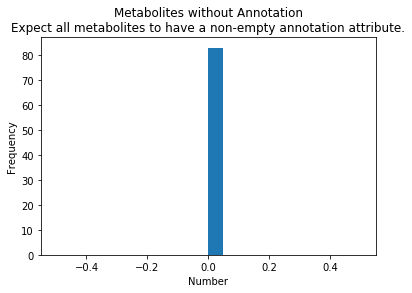

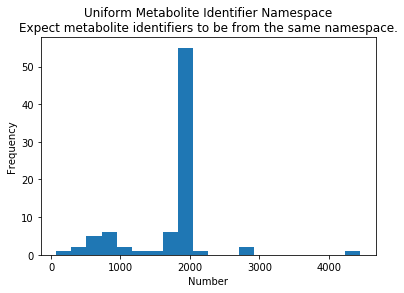

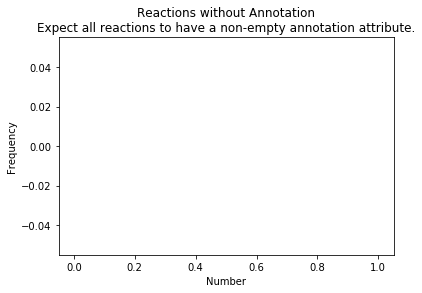

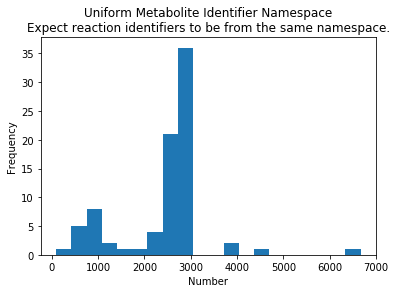

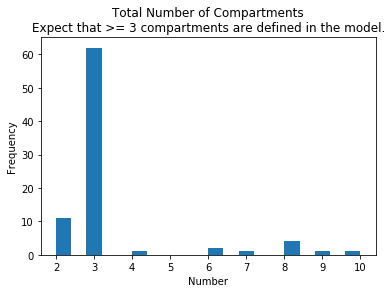

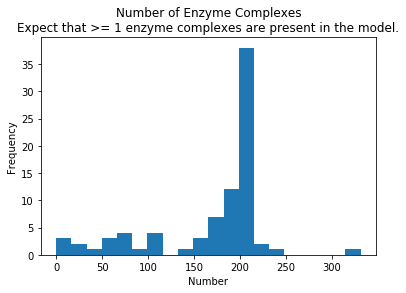

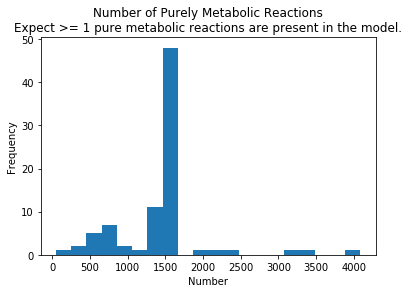

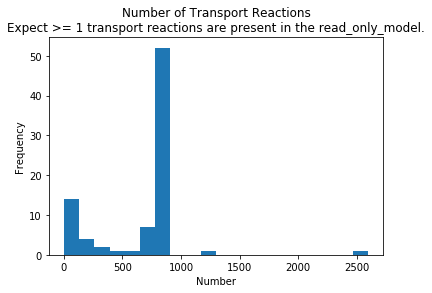

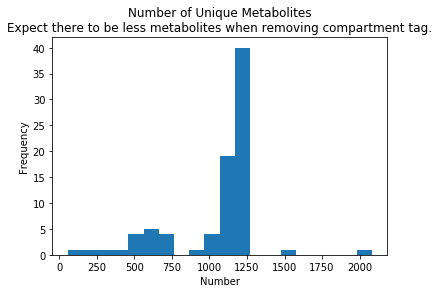

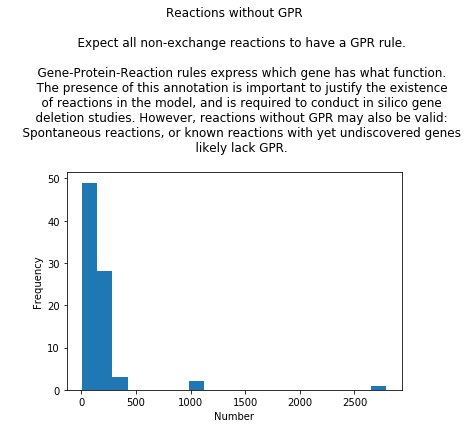

ValueError: setting an array element with a sequence

AttributeError: 'NoneType' object has no attribute 'seq'

In [36]:
for m, t, s in zip(other, titles, summaries):
    plot_raw_hist(m, t, s)

In [39]:
from csv import QUOTE_NONNUMERIC

In [40]:
meta.to_csv("../data/meta.csv", index=False, quoting=QUOTE_NONNUMERIC)

In [41]:
metric.to_csv("../data/bigg/metrics.csv", index=False, quoting=QUOTE_NONNUMERIC)